# Lab Assignment 1 - Classification

**----- Import all libraries here -----**

In [1]:
# data manipulation
import pandas as pd
import numpy as np
from operator import itemgetter 

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # Confusion matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis 

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [2]:
# --- Your code here ---
pima = pd.read_csv("diabetes.csv")
#pima.head()
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. *(3 points)*</span>

In [3]:
# --- Your code here ---
# Missing values for all attributes
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Replace missing values with mean
pima['BloodPressure'] = pima['BloodPressure'].replace({np.nan:pima.BloodPressure.mean().round()})
pima['SkinThickness'] = pima['SkinThickness'].replace({np.nan:pima.SkinThickness.mean().round()})
pima['DiabetesPedigreeFunction'] = pima['DiabetesPedigreeFunction'].replace({np.nan:pima.DiabetesPedigreeFunction.mean().round(3)})


<span style="color:blue">--- Your answer here ---</span>
<br><span style="color:green">**ANS:** Normally with only few missing values, we delete them. But since deletion is not an option here, I simply replace missing values with the mean value. As for zero values that obviously are outliers  (bloodpressure cannot be 0), I will tend to them in section 4.</span>

<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. *(3 points)*</span>

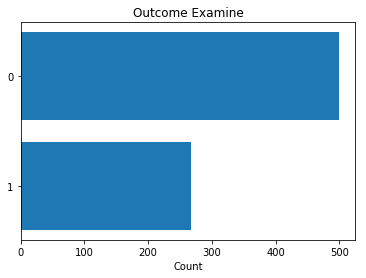

In [5]:
# --- Your code here ---
objects = ('1', '0')
y_pos = np.arange(len(objects))
counts = [(pima['Outcome'] == 1).sum(), (pima['Outcome'] == 0).sum()]

plt.barh(y_pos, counts, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.title('Outcome Examine')

plt.show()

<span style="color:blue">--- Your answer here ---</span><br><span style="color:green">**ANS:** It seems like the outcome is unbalanced. Then we konw accuracy is probably not a good metric, because a model always resulting with zero will get 65% accuracy. So we should also consider F1-score.

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. *(2 points)*</span>

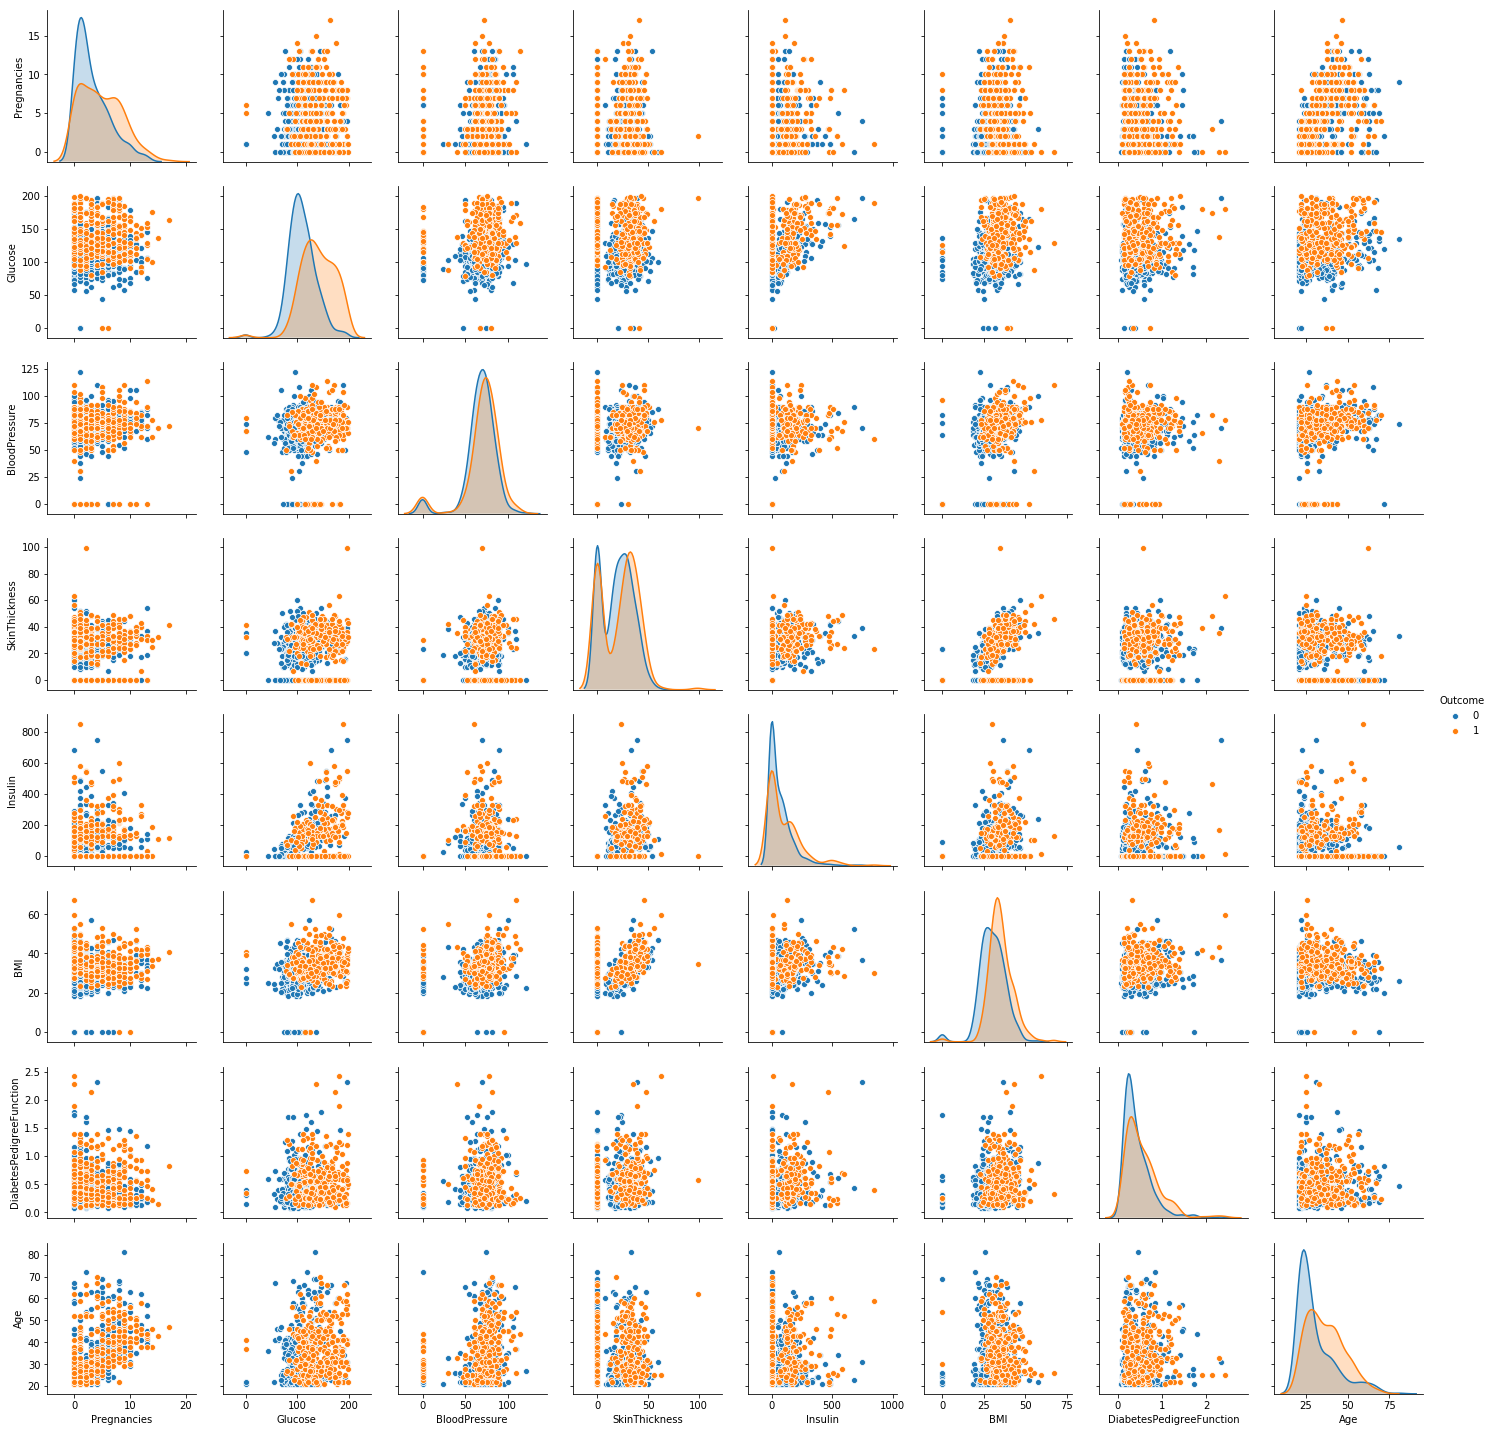

In [6]:
# --- Your code here ---
sb.pairplot(pima, vars = pima.columns.tolist()[0:8], hue='Outcome')

<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target). *(2 points)*<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

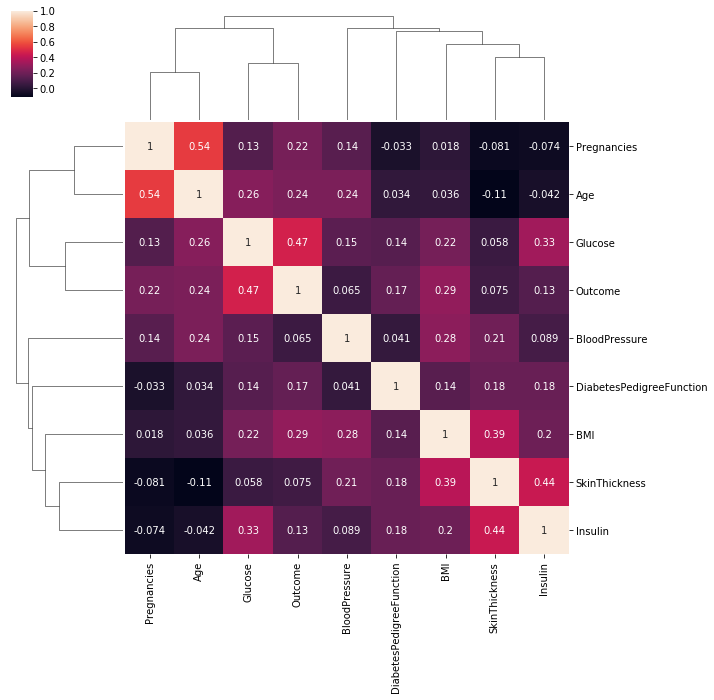

In [7]:
# --- Your code here ---
sb.clustermap(pima.corr(), annot=True)

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)? *(3 points)*</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Your answer here ---</span><br>
<span style = "color:green">**ANS:** From the above plots, we can see that each column of data has correlations with the hue variable. So I should consier more carefully whether to delete some data with many outliers.

# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(5 points)*</span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [8]:
# --- Your code here ---
pima1 = pima[:]
pima1.Pregnancies = pd.cut(pima1['Pregnancies'],4, labels=[0,1,2,3])
# According to American Diabetes Association
pima1.Glucose = pd.cut(pima1['Glucose'],[50,139.99,199.99,250], labels=[0, 1, 2])
""" According to The American Heart Association:
Normal(optimum): <80 
Prehypertension: 80–89 
Hypertension(Stage 1): 90–99 
Hypertension(Stage 2): >100
Hypertensive Crisis: >110
"""
pima1.BloodPressure = pd.cut(pima1['BloodPressure'],[0,79.99,89.99,99.99,109.99,150], labels=[0,1,2,3,4])
pima1.SkinThickness = pd.cut(pima1['SkinThickness'],4, labels=[0,1,2,3])
pima1.Insulin = pd.cut(pima1['Insulin'],4, labels=[0,1,2,3])
pima1.BMI = pd.cut(pima1['BMI'],4, labels=[0,1,2,3])
pima1.DiabetesPedigreeFunction = pd.cut(pima1['DiabetesPedigreeFunction'],4, labels=[0,1,2,3])
pima1.Age = pd.cut(pima1['Age'],4, labels=[0,1,2,3])

pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,0,1,0,2,0,1,1
1,0,0,0,1,0,1,0,0,0
2,1,1,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,2,3,0,1


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [9]:
# --- Your code here ---
pima1 = pd.get_dummies(pima1)
pima1.head()

,Outcome,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Glucose_0,Glucose_1,Glucose_2,BloodPressure_0,BloodPressure_1,...,BMI_2,BMI_3,DiabetesPedigreeFunction_0,DiabetesPedigreeFunction_1,DiabetesPedigreeFunction_2,DiabetesPedigreeFunction_3,Age_0,Age_1,Age_2,Age_3
0,1,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0


<span style="color:blue">3) Discuss whether the use of one-hot encoding can be omitted and why? *(3 points)*</span>

<span style="color:blue">--- Your answer here ---<br><span style="color:green">**ANS:** Categorical data usually cannot be processed in machine learning algorithms (except for decision tree), then we have to convert categories to numerical values for further data processing.

**Feature set 2 - Features normalization**

<span style="color:blue">4) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [10]:
# --- Your code here ---
pima2 = pima[:]
cols = pima2.columns.tolist()[0:8]
for col in cols:
    pima2[col] = (pima2[col] - pima2[col].mean()) / pima2[col].std()
pima2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.148835,0.907622,-0.692439,0.203880,0.469218,1.425067,1
1,-0.844335,-1.122665,-0.161216,0.531412,-0.692439,-0.683976,-0.364046,-0.190548,0
2,1.233077,1.942458,-0.264566,-1.286934,-0.692439,-1.102537,0.605076,-0.105515,1
3,-0.844335,-0.997558,-0.161216,0.155203,0.123221,-0.493721,-0.919554,-1.040871,0
4,-1.141108,0.503727,-1.504771,0.907622,0.765337,1.408828,5.483893,-0.020483,1


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case. *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span><br>
<span style = "color:green">**ANS:** Set 2 is relatively more useful. Because when our data is ordinal rather than categorical, one-hot is not an ideal option. And normalization is necessary because our data ranges differently, so we need to scale it.

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [11]:
# pima1 split
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 32) (768,)
(768, 8) (768,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2 (You should thus perform 5x2 times model training and evaluation):<br/></span>

<span style="color:blue">- Gaussian naive bayes</span><br/>
<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- SVM</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(20 points)*</span>

In [12]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---
# Gaussian naive bayes
Gaussianed_1 = GaussianNB()
Gaussianed_1.fit(x_train1, y_train1);
pima1_acc.append(Gaussianed_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Gaussianed_1.predict(x_test1), average='weighted') )

Gaussianed_2 = GaussianNB()
Gaussianed_2.fit(x_train2, y_train2);
pima2_acc.append(Gaussianed_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Gaussianed_2.predict(x_test2), average='weighted') )

# K-Nearest neighbors
Kneigh_1 = KNeighborsClassifier()
Kneigh_1.fit(x_train1, y_train1)
pima1_acc.append(Kneigh_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Kneigh_1.predict(x_test1), average='weighted') )

Kneigh_2 = KNeighborsClassifier()
Kneigh_2.fit(x_train2, y_train2)
pima2_acc.append(Kneigh_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Kneigh_2.predict(x_test2), average='weighted') )

# Support Vector Machine
SVM_1 = SVC()
SVM_1.fit(x_train1, y_train1)
pima1_acc.append(SVM_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, SVM_1.predict(x_test1), average='weighted') )

SVM_2 = SVC()
SVM_2.fit(x_train2, y_train2)
pima2_acc.append(SVM_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, SVM_2.predict(x_test2), average='weighted') )

# Logistic regression
Logic_1 = LogisticRegression()
Logic_1.fit(x_train1, y_train1);
pima1_acc.append(Logic_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Logic_1.predict(x_test1), average='weighted') )

Logic_2 = LogisticRegression()
Logic_2.fit(x_train2, y_train2);
pima2_acc.append(Logic_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Logic_2.predict(x_test2), average='weighted') )

# Decision tree
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(x_train1, y_train1);
pima1_acc.append(Tree_1.score(x_test1,y_test1))
pima1_f1.append(f1_score(y_test1, Tree_1.predict(x_test1), average='weighted') )

Tree_2 = DecisionTreeClassifier()
Tree_2.fit(x_train2, y_train2);
pima2_acc.append(Tree_2.score(x_test2,y_test2))
pima2_f1.append(f1_score(y_test2, Tree_2.predict(x_test2), average='weighted') )

# --- End of your code ---

accuracy_record = pd.DataFrame({'Model': model_names, 'pima1_acc': pima1_acc, 'pima2_acc': pima2_acc})
accuracy_record['acc_mean'] = accuracy_record.mean(axis=1).round(2)
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'pima1_f1': pima1_f1, 'pima2_f1': pima2_f1})
F1_record['F1_mean'] = F1_record.mean(axis=1).round(2)
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

             pima1_acc  pima2_acc  acc_mean
Model                                      
Gaussian NB   0.692708   0.765625     0.730
KNN           0.734375   0.812500     0.770
SVM           0.765625   0.776042     0.770
LR            0.770833   0.802083     0.790
DT            0.718750   0.718750     0.720
avg           0.736458   0.775000     0.756


             pima1_f1  pima2_f1  F1_mean
Model                                   
Gaussian NB  0.622447  0.757481     0.69
KNN          0.717222  0.808833     0.76
SVM          0.754198  0.765123     0.76
LR           0.758795  0.794545     0.78
DT           0.703975  0.719892     0.71
avg          0.711328  0.769175     0.74


<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select one to be used in the following tasks. *(2 points)*</span>

<span style="color:blue">--- Your answer ---</span><br>
<span style="color:green">**ANS:** From the print above, we can see that ***pima2*** generates better results for both accuracy and f1-score. And that perhaps is because our continuous data is ordinal, so one-hot is not the ideal choice here.

<span style="color:blue">3) Select one classification model from 1). Discuss which are the hyperparameters that may affect the model performance the most. Perform grid search with 10 folds cross-validation for tuning those hyperparameters on the training set of either pima1 or pima2 (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(15 points)*</span>

<span style="color:blue">*(Hint: for each selected hyperparameter, you need to prepare a list of reasonable values for tunining. Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<span style="color:blue">--- Your choice of hyperparameters here ---</span><br><span style = "color:green">***Classification***: SVM<br>***Hyperparameter***: kernel, Cs, gammas<br>***Training set***:  pima2
<br><span style="color:black">Original scores: Accuracy = 0.776042; F1 score = 0.765123
<br>Default C = 1.0; gamma = 'auto'; kernel = 'rbf'


In [13]:
# --- Your code here ---
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear','rbf']
param_grid = {'kernel' : kernels, 'C': Cs, 'gamma' : gammas}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train2, y_train2)
print("Best configuration:", grid.best_params_)
print("Accuracy: ", grid.score(x_test2, y_test2))
print("Weighted F1 score: ", f1_score(y_test2, grid.predict(x_test2), average='weighted'))

Best configuration: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy:  0.8020833333333334
Weighted F1 score:  0.794544901570449


<span style="color:blue">4) Besides accuracy and F1 scores, one can look at the confusion matrix to understand the model's prediction behaviour. Compare confusion matrix on test data before and after hyperparameter tuning for the selected model in 3). Discuss any of your observations or insights. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **confusion_matrix** from scikit-learn, and use **sb.heatmap(conf_matrix, annot=True)** to plot a corresponding heatmap for better visualization.)*</span>

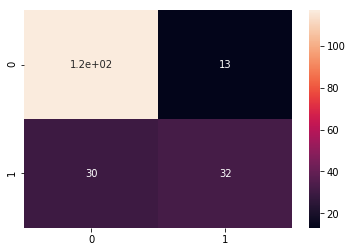

In [14]:
# --- Your code here ---
conf_mat = confusion_matrix(y_test2, SVM_2.predict(x_test2))
sb.heatmap(conf_mat, annot=True)

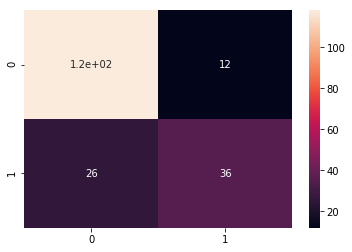

In [15]:
# Confusion matrix with best hyperparameters
conf_mat = confusion_matrix(y_test2, grid.predict(x_test2))
sb.heatmap(conf_mat, annot=True) 

<span style="color:blue">--- Your observations here ---</span><br>
<span style = "color:green">ANS: After tuning hyperparameters, we can see that ***FN*** (False Negative) increases, and ***TN*** (True Negative) and ***FP*** (False Positive) both decreases, which means results are more accurate after tuning.


<span style="color:blue">5) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below. Generate the plot and describe your observations. Briefly describe how the feature importances for the given classifier can be computed. *(5 points)*</span>

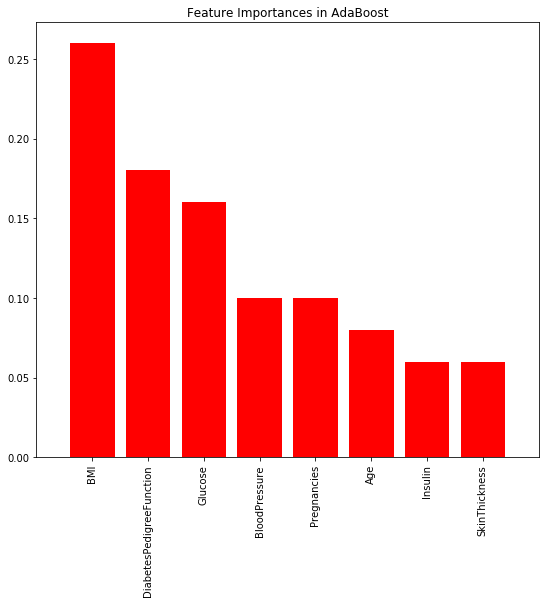

In [16]:
x_train = x_train2
y_train = y_train2

ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
relevants = ada.feature_importances_
indices = np.argsort(relevants)[::-1]

# Plot feature importances
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train.shape[1]), relevants[indices], color='r', align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

<span style="color:blue">--- Your description here ---</span><br>
<span style = "color:green">Observations: ***BMI*** and ***DiabetesPedigreeFunction*** are more significantly important features, while Insulin and SkinThickness do not, which is because too many outliers in those two items.<br>
As for Adaptive boosting classifier, there is an attribute called "feature_importances_". For trees, feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. And the node probability can be calculated by the number of samples that reach the node, divided by the total number of samples.

<span style="color:blue">6)  Think  about  how  to  compute  the  feature  importances  for  other  classifiers  in  1).   Select  one classifier (except decsion tree), and generate a similar bar plot showing the feature importances. *(8 points)*</span>

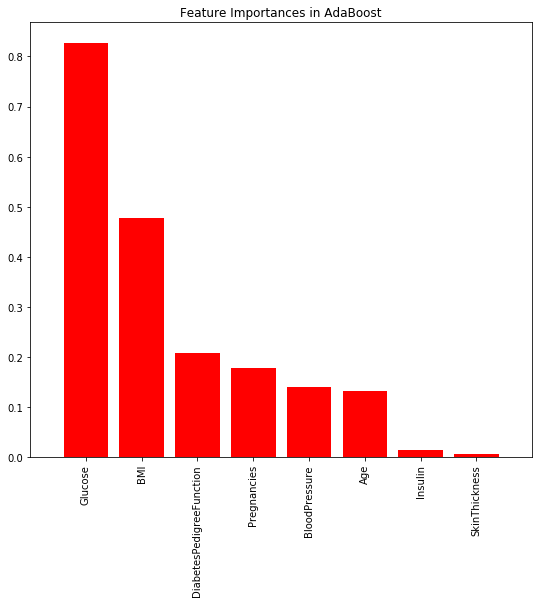

In [17]:
# --- Your code here ---
# Classifier: SVM with best hyperparameters
svm_feature = SVC(C = 0.1, gamma = 0.001, kernel = 'linear')
svm_feature.fit(x_train2,y_train2)
# Get feature using SVC: coef_
relevants1 = abs(svm_feature.coef_[0])
indices = np.argsort(relevants1)[::-1]
plt.figure(1, figsize=(9, 8))
plt.title('Feature Importances in AdaBoost')
plt.bar(range(x_train2.shape[1]), relevants1[indices], color='r', align='center')
plt.xticks(range(x_train2.shape[1]), x_train2.columns[indices], rotation=90)
plt.xlim([-1, x_train2.shape[1]])
plt.show()

# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. *(13 points)*</span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

In [18]:
# From https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [75]:
# --- Your code here ---
pima = pd.read_csv("diabetes.csv")
# Delete duplicates if any
pima.drop_duplicates(subset=None, keep='first', inplace=False)

# Glucose, BloodPressure, SkinThickness, Insulin, BMI should not be 0.
cols = pima.columns.tolist()[1:6]
# Zeros in those categories are as good as NaN
pima[cols] = pima[cols].replace({0:np.nan})
missing_values_table(pima)

Your selected dataframe has 9 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Insulin,374,48.7
SkinThickness,228,29.7
BloodPressure,36,4.7
BMI,11,1.4
Glucose,5,0.7
DiabetesPedigreeFunction,1,0.1


<span style="color:green">As we can see, "Insulin" and "SkinThickness" have many missing values, which will influence our result. So I test it and decide to delete all ***insulin*** data.

In [76]:
# Data cleaning: Calculate non-NaN medians and replace NaN with them
# Update cols: include "DiabetesPedigreeFunction"
cols = pima.columns.tolist()[0:7] 
for index in cols:
    pima[index] = pima[index].replace({np.nan:pima[index].median()})
pima = pima.drop('Insulin', axis = 1);
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [77]:
# Feature transformation: normalization
# Update cols: delete "Insulin", from the above output, we know that only G, BP, ST, BMI, DPF need to be normalized.
cols = pima.columns.tolist()[1:6]
for col in cols:
    pima[col] = (pima[col] - pima[col].min()) / (pima[col].max() - pima[col].min()) * 10
# Normalizing age by hand is sufficient
pima.Age = pima.Age / 10
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,6.709677,4.897959,3.043478,3.149284,2.344150,5.0,1
1,1,2.645161,4.285714,2.391304,1.717791,1.165670,3.1,0
2,8,8.967742,4.081633,2.391304,1.042945,2.536294,3.2,1
3,1,2.903226,4.285714,1.739130,2.024540,0.380017,2.1,0
4,0,6.000000,1.632653,3.043478,5.092025,9.436379,3.3,1


In [78]:
# Dataset split
x = pima.drop(columns='Outcome')
y = pima['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [79]:
# Model construction of several classifier choices: KNN, SVM, LR, DT, Adaboost, RandomForest
model_names = ['KNN', 'SVM', 'LR', 'DT', 'ADA', 'RF']
pima_acc = []
pima_f1 = []

# K-Nearest neighbors
Kneigh = KNeighborsClassifier()
Kneigh.fit(x_train, y_train)
pima_acc.append(Kneigh.score(x_test,y_test))
pima_f1.append(f1_score(y_test, Kneigh.predict(x_test), average='weighted') )

# Support Vector Machine
SVM = SVC()
SVM.fit(x_train, y_train)
pima_acc.append(SVM.score(x_test,y_test))
pima_f1.append(f1_score(y_test, SVM.predict(x_test), average='weighted') )

# Logistic regression
Logic = LogisticRegression()
Logic.fit(x_train, y_train)
pima_acc.append(Logic.score(x_test,y_test))
pima_f1.append(f1_score(y_test, Logic.predict(x_test), average='weighted') )

# Decision tree
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)
pima_acc.append(Tree.score(x_test,y_test))
pima_f1.append(f1_score(y_test, Tree.predict(x_test), average='weighted') )

# Adaboost
Ada = AdaBoostClassifier()
Ada.fit(x_train, y_train)
pima_acc.append(Ada.score(x_test,y_test))
pima_f1.append(f1_score(y_test, Ada.predict(x_test), average='weighted') )

# Random forest
Forest = RandomForestClassifier()
Forest.fit(x_train, y_train)
pima_acc.append(Forest.score(x_test,y_test))
pima_f1.append(f1_score(y_test, Forest.predict(x_test), average='weighted') )

# Scoring results
accuracy_record = pd.DataFrame({'Model': model_names, 'accuracy': pima_acc})
accuracy_record.set_index('Model', inplace=True)
accuracy_record.loc['avg'] = accuracy_record.mean()

F1_record = pd.DataFrame({'Model': model_names, 'f1_score': pima_f1})
F1_record.set_index('Model', inplace=True)
F1_record.loc['avg'] = F1_record.mean()

print(accuracy_record)
print('\n')
print(F1_record)

       accuracy
Model          
KNN    0.770833
SVM    0.776042
LR     0.781250
DT     0.765625
ADA    0.765625
RF     0.713542
avg    0.762153


       f1_score
Model          
KNN    0.769830
SVM    0.769686
LR     0.772918
DT     0.766110
ADA    0.762912
RF     0.699576
avg    0.756839


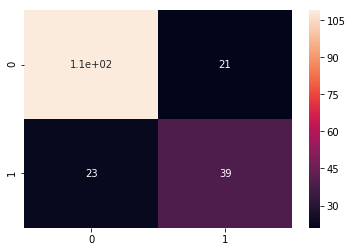

In [80]:
# KNN
conf_mat = confusion_matrix(y_test, Kneigh.predict(x_test))
sb.heatmap(conf_mat, annot=True)

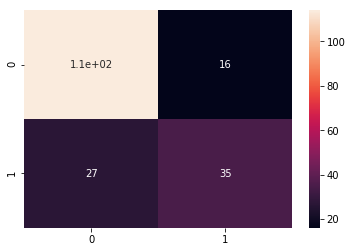

In [81]:
# SVM
conf_mat = confusion_matrix(y_test, SVM.predict(x_test))
sb.heatmap(conf_mat, annot=True)

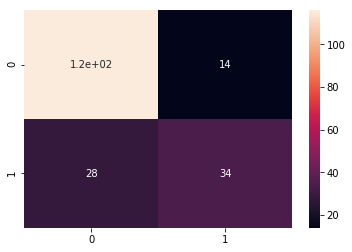

In [82]:
# Logistic Regression
conf_mat = confusion_matrix(y_test, Logic.predict(x_test))
sb.heatmap(conf_mat, annot=True)

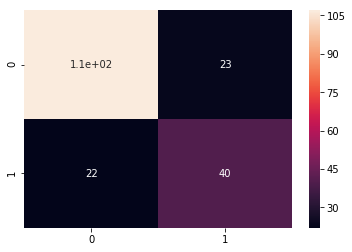

In [83]:
# Decision Tree
conf_mat = confusion_matrix(y_test, Tree.predict(x_test))
sb.heatmap(conf_mat, annot=True)

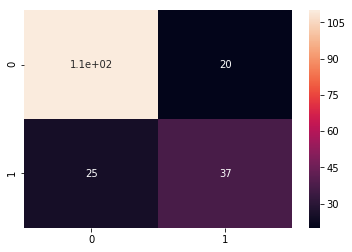

In [84]:
# Adaboost
conf_mat = confusion_matrix(y_test, Ada.predict(x_test))
sb.heatmap(conf_mat, annot=True)

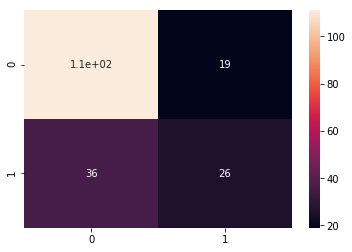

In [85]:
# Random Forest
conf_mat = confusion_matrix(y_test, Forest.predict(x_test))
sb.heatmap(conf_mat, annot=True)

<span style = "color:green">As we can see, ***K-Nearest neighbors***, ***Support Vector Machine*** and ***Logistic Regression*** are better results. Then we tune for best hyperparameters of them.

In [86]:
# Hyperparameter tuning: K-Nearest neighbors
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 20, scoring = 'accuracy')
grid.fit(x_train, y_train)
print("Best configuration:", grid.best_params_)
print("Accuracy: ", grid.score(x_test, y_test))
print("Weighted F1 score: ", f1_score(y_test, grid.predict(x_test), average='weighted'))

Best configuration: {'n_neighbors': 22, 'weights': 'uniform'}
Accuracy:  0.7708333333333334
Weighted F1 score:  0.7530164319248827


In [87]:
# Hyperparameter tuning: Support Vector Machine
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear','rbf']
param_grid = {'kernel' : kernels, 'C': Cs, 'gamma' : gammas}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 20, scoring = 'accuracy')
grid.fit(x_train, y_train)
print("Best configuration:", grid.best_params_)
print("Accuracy: ", grid.score(x_test, y_test))
print("Weighted F1 score: ", f1_score(y_test, grid.predict(x_test), average='weighted'))

Best configuration: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy:  0.7760416666666666
Weighted F1 score:  0.7651229517415117


In [88]:
# Hyperparameter tuning: Logistic Regression
C = np.logspace(0, 4, 10)
param_grid = [
  {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': C},
  {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'C': C},
 ]
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 20, scoring= 'accuracy')
grid.fit(x_train, y_train)
print("Best configuration:", grid.best_params_)
print("Accuracy: ", grid.score(x_test, y_test))
print("Weighted F1 score: ", f1_score(y_test, grid.predict(x_test), average='weighted'))

Best configuration: {'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.7864583333333334
Weighted F1 score:  0.7775889630247428


<span style="color:blue">--- Your description here ---</span><br>
<span style = "color:black">Best Resules: Logistic Regression<br>accuracy= 0.79 <br>f1-score= 0.78<br>
<span style = "color:green">**DESCRIPTION:** When tuning those hyperparameters, I used 20-folds for a best fit. And it turns out that the default setting of hyperparams already provides the best results approximately. While grid search actually will generate better results than defaults for iris data when I test it, it doen not in our case. So I believe the dataset is not good enough: It is small and lacking columns. Results are similar whether I delete "Insulin" or not.

<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. *(2 points)*</span><br>
<span style="color:green">**ANS:** It can help doctors **suggest** diagnose results, but certainly not accurate enough. And to use it, doctors should explain very clearly that the prediction result is only generated using previous data. Accuracy of the model should be stated too. I believe in places like hospitals where life and death is concerned, models should be extremely accurate which demmands larger and more precise datasets.